In [67]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

# Descargar los recursos necesarios de NLTK
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('vader_lexicon')
# nltk.download()


# Paso 2: Cargar el archivo de texto
with open('Coursera Comments.txt', 'r', encoding='utf-8') as file:
  text = file.read()


In [68]:
# Tokenización en palabras
words = word_tokenize(text)

# Tokenización en oraciones
sentences = sent_tokenize(text)

# Imprimir ejemplos
print("Palabras:", words[:10])  # Ejemplo de 10 palabras tokenizadas
print("Oraciones:", sentences[:2])  # Ejemplo de 2 oraciones tokenizadas

Palabras: ['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', 'con', '5', 'estrellas']
Oraciones: ['\nAbril Vargas Pérez\n3 opiniones\nPT\nValorada con 5 estrellas sobre 5\n21 ago 2024\nEscandalizada y confundida por las…\nEscandalizada y confundida por las malas reseñas.', 'Estoy en coursera desde el mes de julio 2024 y estoy haciendo actualmente el curso de front-end developer que imparte Meta.']


In [69]:
# Definir las stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Eliminar las palabras vacías
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]

# Imprimir palabras filtradas
print("Palabras filtradas:", filtered_words[:10])


Palabras filtradas: ['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', '5', 'estrellas', '5']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# Lematización
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

# Stemming (raíz de palabras)
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

# Imprimir resultados
print("Lematización:", lemmatized_words[:10])
print("Stemming:", stemmed_words[:10])


Lematización: ['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', '5', 'estrellas', '5']
Stemming: ['abril', 'varga', 'pérez', '3', 'opinion', 'pt', 'valorada', '5', 'estrella', '5']


In [71]:
# Calcular la frecuencia de las palabras
word_freq = Counter(lemmatized_words)

# Mostrar las 10 palabras más comunes
print("Frecuencia de palabras más comunes:", word_freq.most_common(10))


Frecuencia de palabras más comunes: [('curso', 1297), ('Semana', 843), ('TA', 835), ('participantes', 822), ('semana', 780), ('dudas', 744), ('portafolio', 731), ('1', 569), ('si', 551), ('foros', 510)]


In [72]:
# Analizador de sentimientos (VADER)
sia = SentimentIntensityAnalyzer()

# Análisis de sentimiento en el texto completo
sentiment_scores = sia.polarity_scores(text)

# Mostrar resultados del análisis de sentimiento
print("Puntuaciones de sentimiento:", sentiment_scores)


Puntuaciones de sentimiento: {'neg': 0.035, 'neu': 0.954, 'pos': 0.011, 'compound': -1.0}


In [73]:
# Descargar recursos adicionales para reconocimiento de entidades nombradas
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# Extraer entidades nombradas
entities = []
idx = 1
for sent in sentences:
  if idx == 20:
    break
  tokens = word_tokenize(sent)
  tags = nltk.pos_tag(tokens)
  tree = nltk.ne_chunk(tags)
  for subtree in tree:
    if isinstance(subtree, nltk.Tree):
      entity_name = " ".join([token for token, pos in subtree.leaves()])
      entity_type = subtree.label()
      entities.append((entity_name, entity_type))
  idx += 1

# Mostrar las entidades extraídas
print("Entidades nombradas:", entities)


Entidades nombradas: [('Abril', 'PERSON'), ('Vargas Pérez', 'PERSON'), ('PT Valorada', 'ORGANIZATION'), ('Escandalizada', 'PERSON'), ('Estoy', 'GPE'), ('Meta', 'ORGANIZATION'), ('Para', 'GPE'), ('Coursera Plus', 'PERSON'), ('Duré', 'GPE'), ('Ya', 'GPE'), ('Quizás', 'GPE'), ('Yo', 'GPE'), ('En', 'GPE'), ('En', 'GPE'), ('Valorada', 'PERSON'), ('Fecha', 'PERSON'), ('Valorada', 'PERSON'), ('Me', 'GPE'), ('Fecha', 'PERSON'), ('Valorada', 'PERSON'), ('ESTAFADORES', 'ORGANIZATION'), ('ESTAFADORES', 'GPE'), ('Fecha', 'PERSON'), ('ES Valorada', 'ORGANIZATION'), ('ESTAFADORES', 'ORGANIZATION'), ('ESTAFADORES', 'GPE'), ('Mismo', 'GPE'), ('Fecha', 'PERSON'), ('Maria Eugenia Simancas Soriano', 'PERSON'), ('US Valorada', 'ORGANIZATION')]


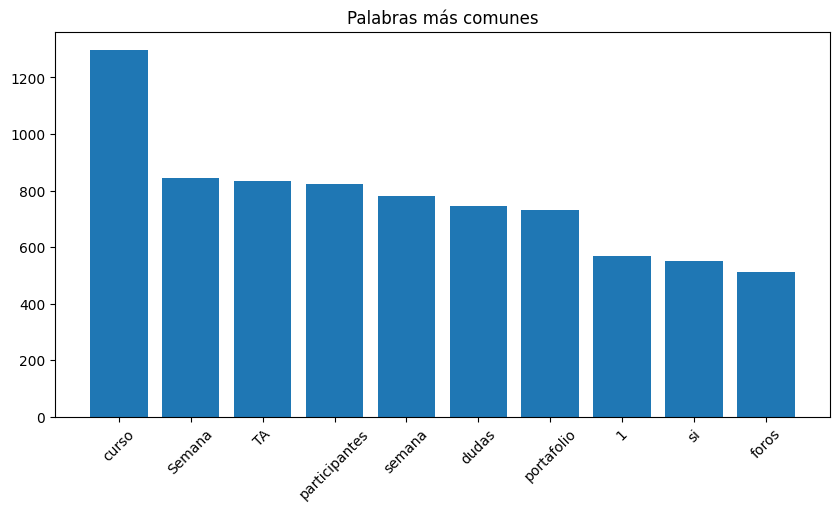

In [74]:
import matplotlib.pyplot as plt

# Gráfico de la frecuencia de las palabras más comunes
most_common_words = word_freq.most_common(10)
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.title("Palabras más comunes")
plt.xticks(rotation=45)
plt.show()
